In [1]:
# from here we get all the importand code
from utils import MLP,step,ReLU,ReLU_derivative,step,mse, linear,linear_derivative,mse_derivative
import numpy as np
import matplotlib.pyplot as plt
import tqdm


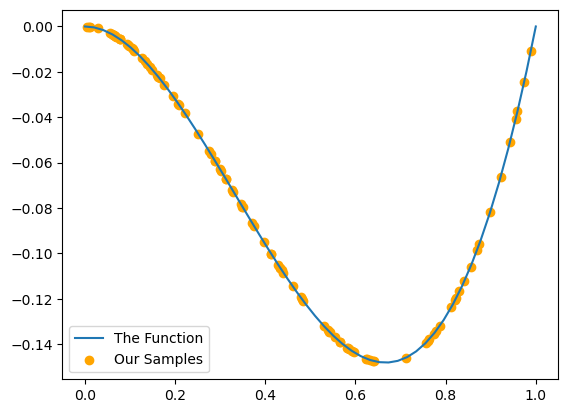

In [2]:

# sampling values
x_vals = np.random.uniform(low=0,high=1,size=100).astype(np.float64)

# defining function
func = np.vectorize(lambda i : i**3 - i**2)

# get true labels
t_vals = func(x_vals).astype(np.float64)

lins_space = np.linspace(0,1)

plt.plot(lins_space,func(lins_space), label= 'The Function')
plt.scatter(x_vals,t_vals,c='orange', label= 'Our Samples')
plt.legend()
plt.show()



Define Our Layer and Create MLP

In [3]:
layers = [(10,ReLU,ReLU_derivative),(1,linear,linear_derivative)]
# we specifially use a linear activation function in the end beacuse a relu simply
# would not make absolutely no sense with a negative function

mlp = MLP(1,layers) # create mlp with a single input dimension


In [4]:
# choose amount of epochs

n_epochs = 1000

# use tqdm for progess bar
tq = tqdm.tqdm(range(n_epochs))

learning = []
for i in  tq:

    current_loss = step(mlp,x_vals,t_vals,mse,mse_derivative)
    learning.append(current_loss)

    #print loss
    if i%20==0:
        tq.set_description(f'Current MSE: {float(current_loss):.5f}',refresh=True)
    


Current MSE: 0.00075: 100%|██████████| 1000/1000 [00:13<00:00, 71.89it/s]


Visualize Results

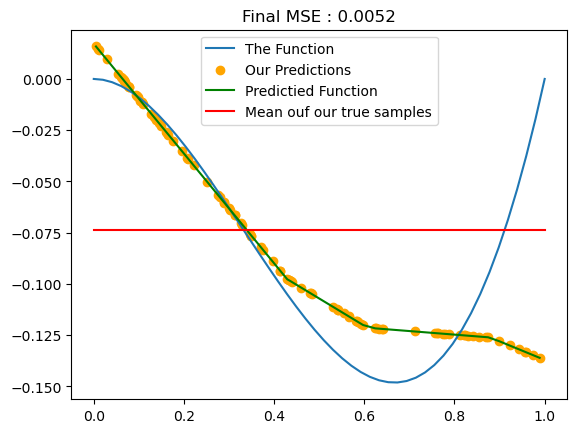

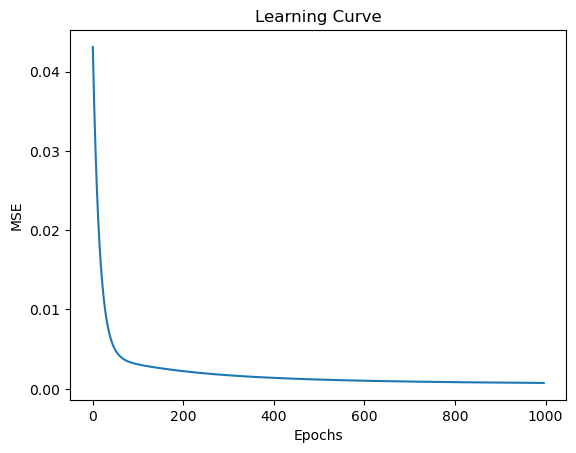

In [5]:
preds = np.array([mlp(x.reshape(1,1)) for x in x_vals])

final_mse = mse(np.array(preds),t_vals).mean()

plt.plot(lins_space,func(lins_space), label= 'The Function')
plt.scatter(x_vals,preds,label = 'Our Predictions',color= 'orange')

sort_by = np.argsort(x_vals)
plt.plot(x_vals[sort_by],preds[sort_by],color='green',label='Predictied Function')

plt.plot(lins_space,[np.mean(t_vals) for x in lins_space],label = 'Mean ouf our true samples',color = 'red')
plt.legend()
plt.title(f"Final MSE : {float(final_mse):.4f}")
plt.show()
plt.plot(learning[3:])
plt.xlabel("Epochs")
plt.ylabel('MSE')
plt.title("Learning Curve")
plt.show()


As we see the module sucessfully learns the mean of the function, which makes mathematically sense. (If we do not use ReLu for the last layer) 

Current MSE: 0.00001: 100%|██████████| 1000/1000 [01:57<00:00,  8.49it/s]


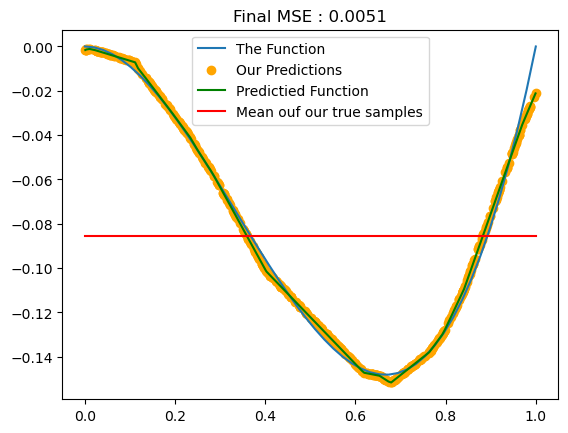

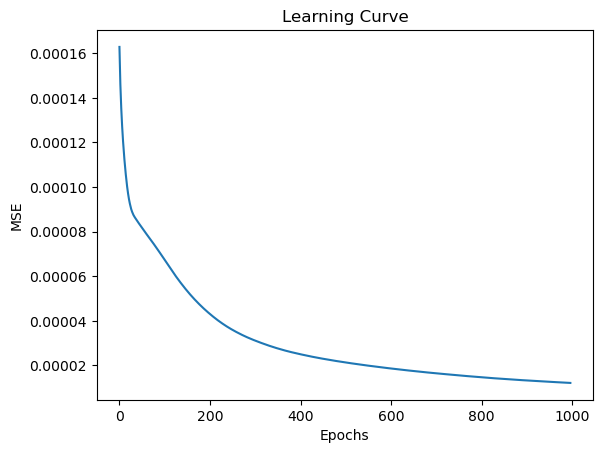

In [6]:
# NICHT AUSFÜHREN UND DANN PUSHEN!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# sampling values
x_vals = np.random.uniform(low=0,high=1,size=500).astype(np.float64)

# defining function
func = np.vectorize(lambda i : i**3 - i**2)

# get true labels
t_vals = func(x_vals).astype(np.float64)

layers = [(50,ReLU,ReLU_derivative),(50,ReLU,ReLU_derivative),(50,ReLU,ReLU_derivative),(1,linear,linear_derivative)]
# we specifially use a linear activation function in the end beacuse a relu simply
# would not make absolutely no sense with a negative function

mlp = MLP(1,layers,variance = 0.25) # create mlp with a single input dimension


# choose amount of epochs

n_epochs = 1000

# use tqdm for progess bar
tq = tqdm.tqdm(range(n_epochs))

learning = []
for i in  tq:

    current_loss = step(mlp,x_vals,t_vals,mse,mse_derivative)
    learning.append(current_loss)

    #print loss
    if i%20==0:
        tq.set_description(f'Current MSE: {float(current_loss):.5f}',refresh=True)
    

preds = np.array([mlp(x.reshape(1,1)) for x in x_vals])

final_mse = mse(np.array(preds),t_vals).mean()

plt.plot(lins_space,func(lins_space), label= 'The Function')
plt.scatter(x_vals,preds,label = 'Our Predictions',color= 'orange')

sort_by = np.argsort(x_vals)
plt.plot(x_vals[sort_by],preds[sort_by],color='green',label='Predictied Function')

plt.plot(lins_space,[np.mean(t_vals) for x in lins_space],label = 'Mean ouf our true samples',color = 'red')
plt.legend()
plt.title(f"Final MSE : {float(final_mse):.4f}")
plt.show()
plt.plot(learning[3:])
plt.xlabel("Epochs")
plt.ylabel('MSE')
plt.title("Learning Curve")
plt.show()


